In [1]:
%cd ..

/home/gianscarpe/dev/event-camera


In [5]:
import dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
from matplotlib import pyplot as plt
import albumentations
%matplotlib inline
time_path = "/home/gianscarpe/dev/data/dhp19/time_count_dataset/movements_per_frame/"
voxel_path = '/home/gianscarpe/dev/data/dhp19/voxel_grid_dataset/movements_per_frame/'

In [3]:
from albumentations import *
from albumentations.pytorch import ToTensor


In [6]:
import os
import re
from utils.generate_indexes import save_npy_indexes_and_map
file_paths, train_index, val_index, test_index = save_npy_indexes_and_map(voxel_path, split_at=0.8)

Creating split ...
.npy|.mat


In [7]:
print(len(file_paths))

87712


In [36]:
transform_val = Compose([
    CenterCrop(224, 224),
    Normalize(mean=[6.0739e-05, 1.0705e-04, 1.0672e-04, 6.2473e-05], std=[0.0007, 0.0011, 0.0011, 0.0007]),
    ToTensor()
])

In [38]:
d = dataset.get_dataset(file_paths, index=val_index, preload=False, n_channels=1, preprocess=transform_val)

In [10]:
len(d.x_indexes)

5009

In [39]:
#from https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/2
loader = DataLoader(
    d,
    batch_size=32,
    num_workers=1,
    shuffle=False
)

## Mean and Std

In [33]:
mean = 0.
std = 0.
nb_samples = 0.
counts = torch.zeros(33)
for data, labels in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples
    for i in labels:
        counts[i]+=1

mean /= nb_samples
std /= nb_samples

In [34]:
print(f"Mean: {mean} | Std: {std}")

Mean: tensor([6.0739e-05, 1.0705e-04, 1.0672e-04, 6.2473e-05]) | Std: tensor([0.0007, 0.0011, 0.0011, 0.0007])


In [ ]:
counts = torch.zeros(33)
for data, i in d:
    counts[i]+=1

plt.bar(np.arange(1, 34), counts.numpy().astype('int'))

## Visually evaluate loader

In [40]:
from torchvision import transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

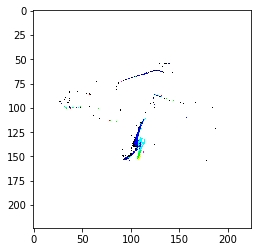

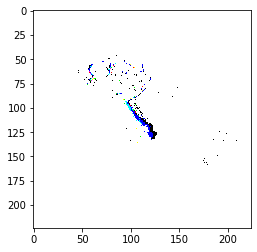

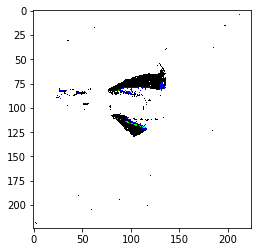

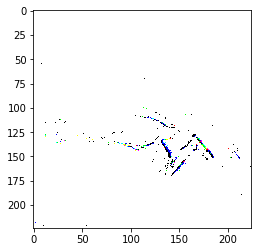

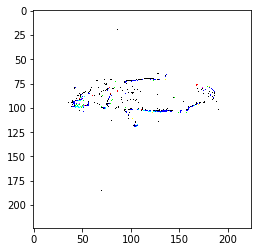

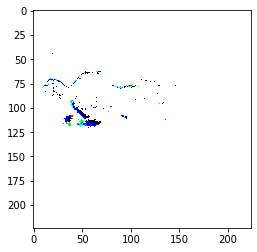

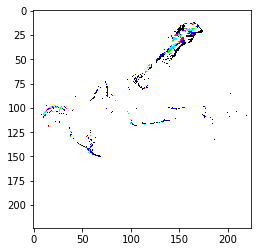

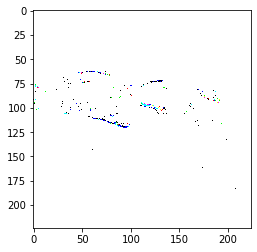

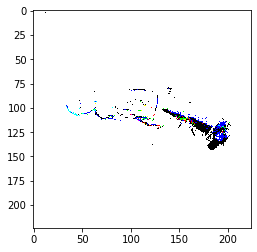

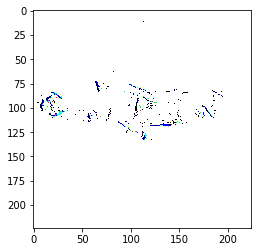

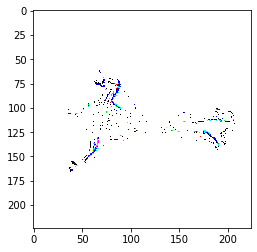

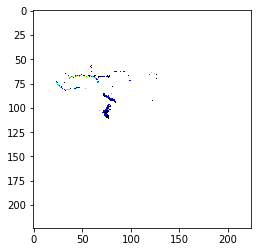

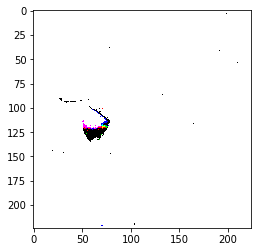

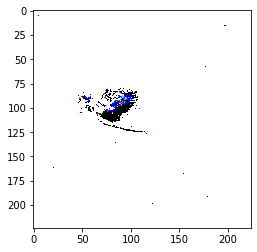

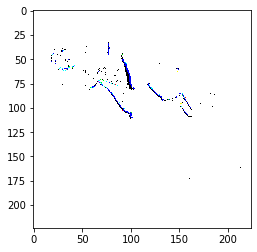

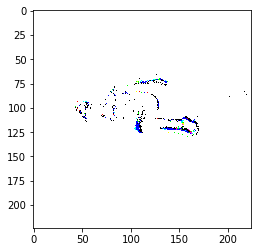

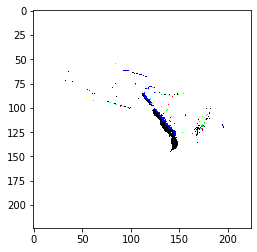

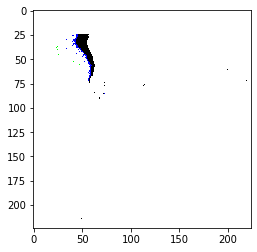

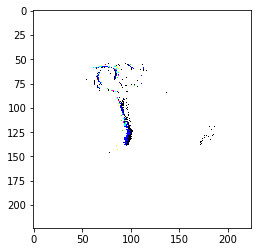

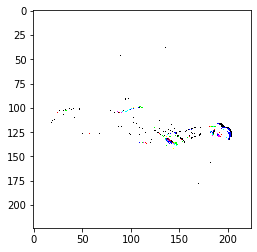

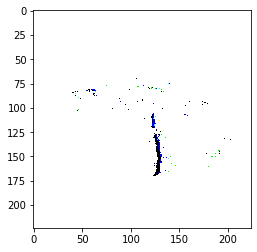

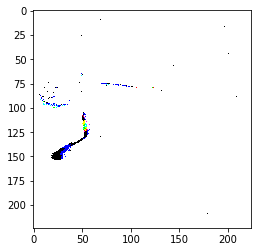

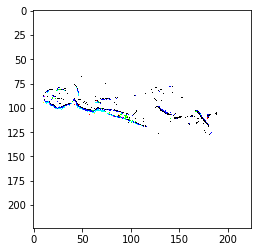

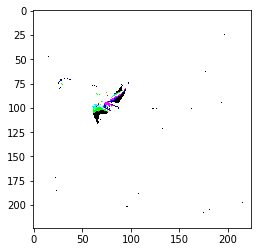

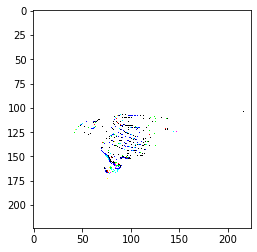

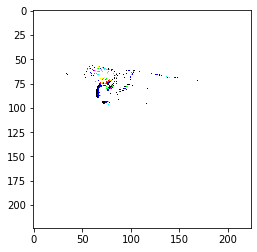

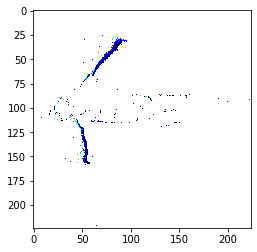

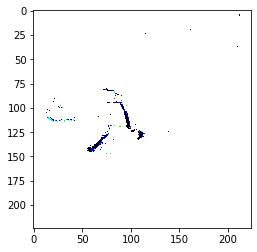

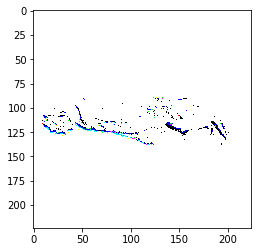

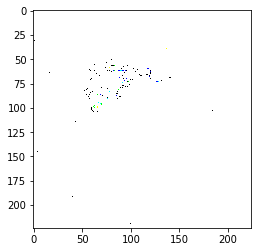

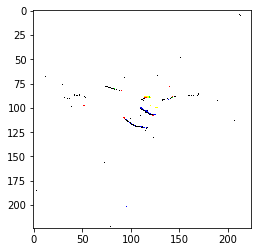

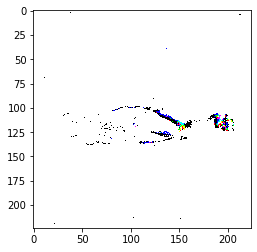

In [41]:
it = iter(loader)
b_x, b_y = next(it)
for img, label in zip(b_x, b_y):
    plt.figure()
    plt.imshow(np.swapaxes(img, 0, -1))

In [49]:
img.std()

tensor(0.9696)